# Markdown Cell

## Sub heading

This is just a paragraph.

In [1]:
# code cell
name = "Jonathan"

# Tips and Tricks

A markdown cell lets you do many _useful things_.

In [2]:
# Add this to python2 code to make life easier -- safe to use in python3 as well.
from __future__ import absolute_import, division, print_function

In [3]:
import numpy as np

# don't do:
# from numpy import *

In [4]:
max("a")

'a'

In [5]:
np.max("a")

TypeError: cannot perform reduce with flexible type

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pivottablejs import pivot_ui
import sys
import warnings

warnings.filterwarnings("ignore")

# Keyboard shortcuts

Practice doing these a few times and try to force yourself to use them whenever you can. 

## Help (h)
For help in the Notebook, `ESC` + `h`
(doesn't work in Lab)

## Select multiple cells

j, k, and arrow keys while holding shift selects multiple cells.

In [8]:
first = 1

In [9]:
second = 2

In [10]:
third = 3

## Split a cell with -

Well, ctrl + shift + -, but remember it by horizontal.

## Add a new cell (a)bove

## Add a new cell (b)elow

## (d)(d)elete 

## (c)opy cells

## (v)aste cells

# Pivot Tables w/ pandas

A library and example from: http://nicolas.kruchten.com/content/2015/09/jupyter_pivottablejs/

In [11]:
# df = pd.read_csv("../data/mps.csv", encoding="ISO-8859-1")
# canadian_politics = pd.read_csv("../data/montreal_2014.csv",)
canadian_politics = pd.read_csv("../data/mps2.csv")

In [12]:
# recommend using .head()
canadian_politics.head(10)

,Name,Party,Province,Age,Gender
0,"Liu, Laurin",NDP,Quebec,22.0,Female
1,"Mourani, Maria",Bloc Quebecois,Quebec,43.0,Female
2,"Sellah, Djaouida",NDP,Quebec,NaN,Female
3,"St-Denis, Lise",NDP,Quebec,72.0,Female
4,"Fry, Hedy",Liberal,British Columbia,71.0,Female
5,"Turmel, Nycole",NDP,Quebec,70.0,Female
6,"Sgro, Judy",Liberal,Ontario,68.0,Female
7,"Raynault, Francine",NDP,Quebec,67.0,Female
8,"Davidson, Patricia",Conservative,Ontario,66.0,Female
9,"Smith, Joy",Conservative,Manitoba,65.0,Female


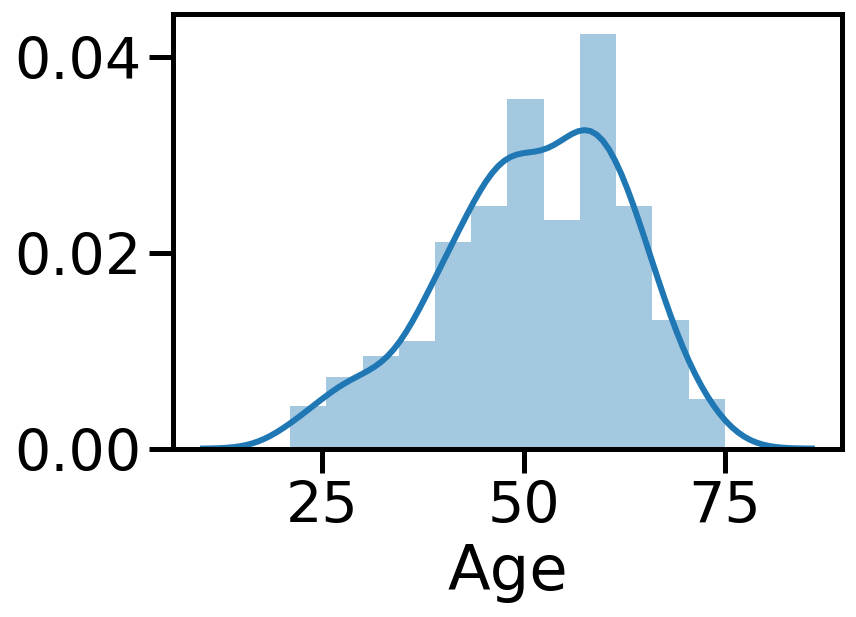

In [18]:
sns.distplot(canadian_politics["Age"].dropna())

In [16]:
sns.set_context("poster", font_scale=1.3)

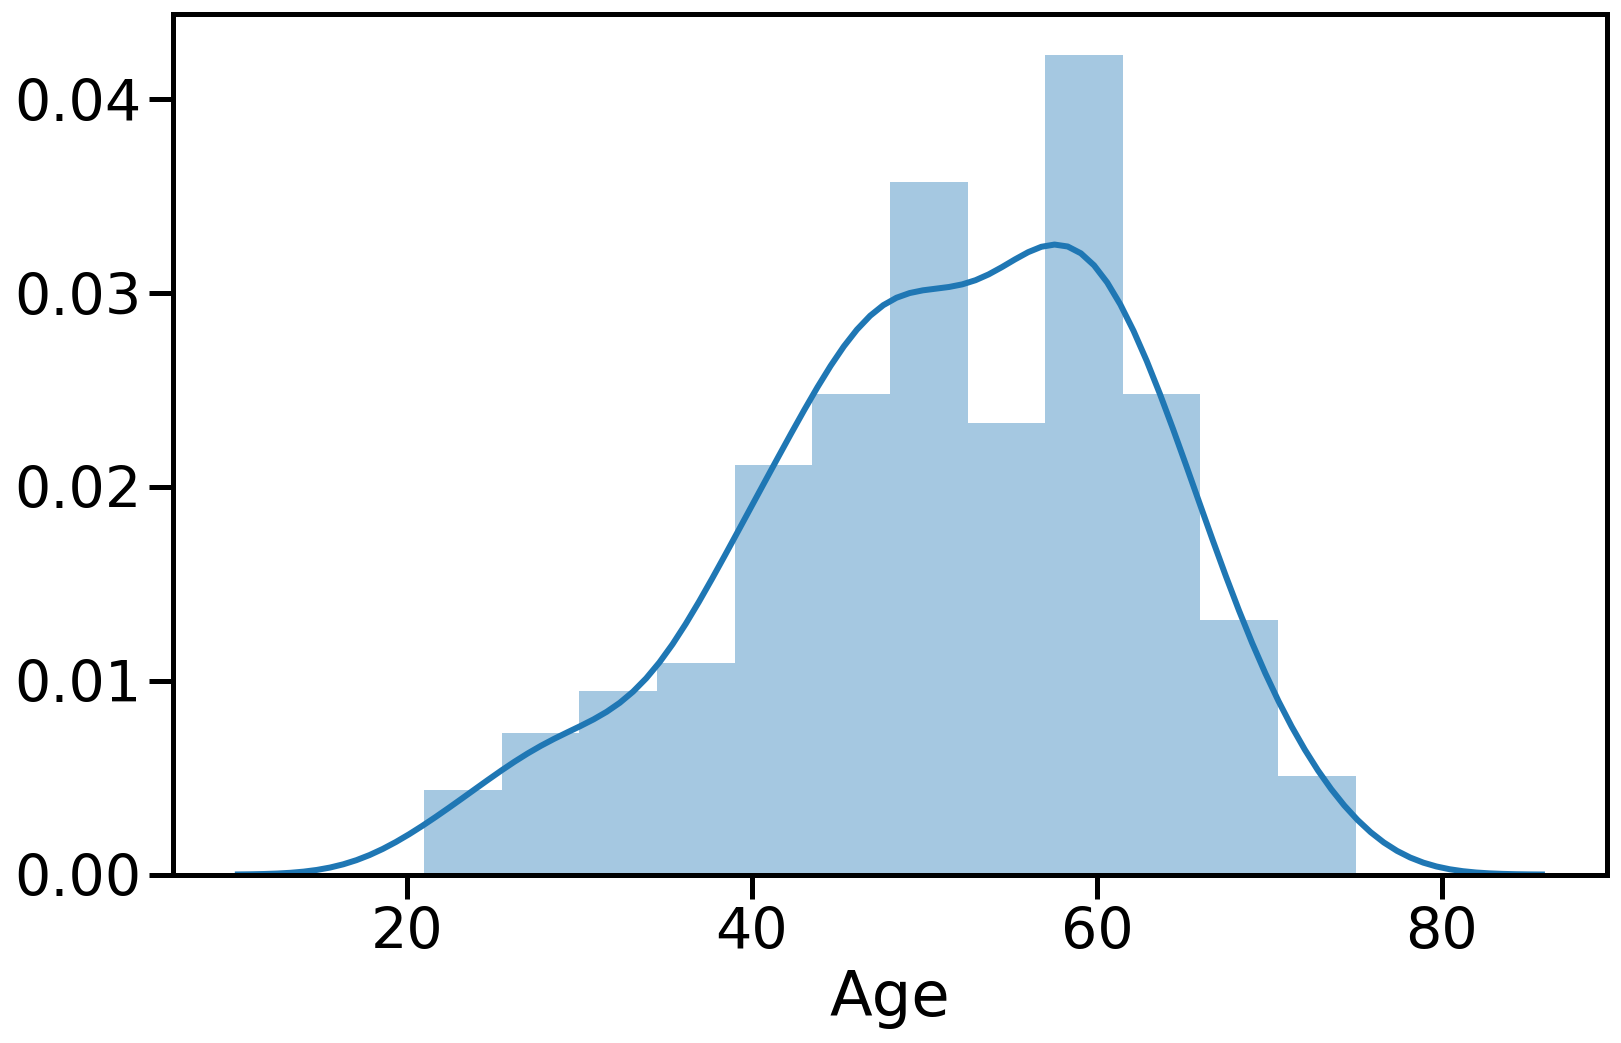

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(canadian_politics["Age"].dropna())
fig.tight_layout()

# Enhanced Pandas Dataframe Display

In [12]:
# Province, Party, Average, Age, Heatmap

In [19]:
pivot_ui(canadian_politics)

# Tab

In [20]:
import numpy as np

In [ ]:
np.random.chisquare()

In [ ]:
# pure tab right ↓ less useful
np.random.choice()

## shift-tab

In [23]:
# shift-tab right ↓ more useful
np.linspace(start=50, endpoint=False, stop=100)

array([50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
       63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
       76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88.,
       89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.])

## shift-tab-tab

## shift-tab-tab-tab

In [ ]:
np.linspace(50, 150, num=100, endpoint=False)

## shift-tab-tab-tab-tab

In [ ]:
plt.plot(np.linspace(start, stop))

## ?

In [21]:
np.linspace?

In [25]:
?np.linspace

## ??

(Lab can scroll if you click)

In [23]:
np.linspace??

In [24]:
!subl ~/miniconda3/envs/dspy3/lib/python3.6/site-packages/numpy/core/function_base.py

In [25]:
import textwrap
def example_function():
    """Docstring for example function"""
    
    print(textwrap.dedent("""
    This is a multi-lined string
    that I want to write inside of a function.
    Notice what happens when I print this.
        And when something is indented more."""))


example_function()


This is a multi-lined string
that I want to write inside of a function.
Notice what happens when I print this.
    And when something is indented more.


## Inspect _everything_ and Find and Replace

In [31]:
# But first find and replace
def silly_function(xval):
    """Takes a value and returns the value."""
    xval_sq = xval ** 2.0
    1 + 12
    xval_abs = np.sqrt(xval_sq)
    return xval_abs

In [28]:
silly_function(-2,)

2.0

In [29]:
silly_function?

In [32]:
silly_function??

In [33]:
!ls ../data/

coal_prod_2008.csv           collincountyforeclosures.csv
coal_prod_2009.csv           example.csv
coal_prod_2010.csv           montreal_2014.csv
coal_prod_2011.csv           mps.csv
coal_prod_2012.csv           mps2.csv
coal_prod_cleaned.csv        nbextensions.png
coal_prod_cleaned.csv.zip    raw_players.csv.gz
coalpublic2012.xls


In [34]:
coal_years = !ls ../data/coal_prod_20*.csv

In [35]:
coal_years

['../data/coal_prod_2008.csv',
 '../data/coal_prod_2009.csv',
 '../data/coal_prod_2010.csv',
 '../data/coal_prod_2011.csv',
 '../data/coal_prod_2012.csv']

## Line numbers (lowercase "L")

Type lowercase "L" to have line numbers; shift-L for line numbers notebook-wide.

## Move blocks of code around


### Indent/dedent

    Cmd + [
    Cmd + ]

### Comment

    Cmd + /

In [40]:
example = {}

# Indent/dedent/comment
for index in range(5):
    example["float_one"] = 1.0
    example["float_two"] = 2.0
    example["float_three"] = 3.0
    example["float_four"] = 4.0

## Multicursor magic

Hold down `option`, click and drag (for big cursor).

cmd + click == wherever you click. 

Shift command P -- command palette.

In [41]:
example["one_better_neat"] = 1
example["two_better_neat"] = 2
example["three_better_neat"] = 3
example["four_better_neat"] = 4

## Monospace

You can also get `monospaced` fonts by indenting 4 spaces:

    mkdir toc
    cd toc

## Syntax Highlighting

Wrap with triple-backticks and language:

```bash
mkdir toc
cd toc
wget https://repo.continuum.io/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
```

```SQL
SELECT first_name,
       last_name,
       year_of_birth
FROM presidents
WHERE year_of_birth > 1800;
```

## Headings and LaTeX

With text and $\LaTeX$ support.

$$\begin{align}
        B'&=-\nabla \times E,\\
        E'&=\nabla \times B - 4\pi j
\end{align}$$

# Magics

 - `%` $\equiv$ inline magic
 - `%%` $\equiv$ cell magic

In [42]:
%%latex

If you want to get crazier$\ldots$

\begin{equation}
\oint_S {E_n dA = \frac{1}{{\varepsilon _0 }}} Q_\textrm{inside}
\end{equation}

<IPython.core.display.Latex object>

In [43]:
%%python2
print "hi"

hi


In [44]:
%%bash
wget http://www.ast.cam.ac.uk/~rfc/vpfit11.1.tar.gz
mkdir -p vpfit11
cd vpfit11
tar -xvzf ../vpfit11.1.tar.gz

--2019-06-05 18:38:20--  http://www.ast.cam.ac.uk/~rfc/vpfit11.1.tar.gz
Resolving www.ast.cam.ac.uk (www.ast.cam.ac.uk)... 131.111.71.71
Connecting to www.ast.cam.ac.uk (www.ast.cam.ac.uk)|131.111.71.71|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ast.cam.ac.uk:443/~rfc/vpfit11.1.tar.gz [following]
--2019-06-05 18:38:20--  https://www.ast.cam.ac.uk/~rfc/vpfit11.1.tar.gz
Connecting to www.ast.cam.ac.uk (www.ast.cam.ac.uk)|131.111.71.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3761497 (3.6M) [application/x-gzip]
Saving to: ‘vpfit11.1.tar.gz.2’

     0K .......... .......... .......... .......... ..........  1%  109K 33s
    50K .......... .......... .......... .......... ..........  2%  326K 22s
   100K .......... .......... .......... .......... ..........  4% 14.5M 14s
   150K .......... .......... .......... .......... ..........  5%  326K 13s
   200K .......... .......... .......... .......... .

# Installing crap in notebooks

https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

In [ ]:
import sys
!conda install --prefix {sys.prefix} numpy -y 

In [ ]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install numpy

In [45]:
normal_argument = 12.4
second_argument = 98.4

arg_with_spaces = "the secret to life"

In [46]:
%%bash -s {normal_argument} {second_argument}
echo "This script knows the value of the argument: $1"
echo "It also has no trouble with the second argument: $2"

This script knows the value of the argument: 12.4
It also has no trouble with the second argument: 98.4


In [47]:
%%bash -s "$arg_with_spaces"
echo "This bash script knows $1."

This bash script knows the secret to life.


In [48]:
ls

00-Overview.ipynb                       Untitled.ipynb
01-Tips-and-tricks.ipynb                Untitled1.ipynb
02-NBExtensions.ipynb                   delete.ipynb
03-Git-Integration.ipynb                ex1.png
03-Interactive-Splines.ipynb            history.ipynb
04-Autoreload.ipynb                     jupyterlab-example.md
05-SQL-Example.ipynb                    new-name.ipynb
06-Advanced-Visualization.ipynb         pivottablejs.html
07-Some_basics.ipynb                    presidents.sqlite
08-More_basics.ipynb                    temp
09-Extras.ipynb                         untitled.txt
10-R-stuff.ipynb                        vpfit10/
11-older-stuff.ipynb                    vpfit10.2.tar.gz
12-old-pandas.ipynb                     vpfit10.2.tar.gz.1
2019-06-02-jbw-test-formatter-01.ipynb  vpfit10.2.tar.gz.2
3d-example-plot.html                    vpfit10.2.tar.gz.3
Advanced-Notebook-Tricks.ipynb          vpfit11/
Basic-Plotting.ipynb                    vpfit11.1.tar.gz
Data_Cleaning.

In [49]:
!ls

00-Overview.ipynb                      Untitled.ipynb
01-Tips-and-tricks.ipynb               Untitled1.ipynb
02-NBExtensions.ipynb                  delete.ipynb
03-Git-Integration.ipynb               ex1.png
03-Interactive-Splines.ipynb           history.ipynb
04-Autoreload.ipynb                    jupyterlab-example.md
05-SQL-Example.ipynb                   new-name.ipynb
06-Advanced-Visualization.ipynb        pivottablejs.html
07-Some_basics.ipynb                   presidents.sqlite
08-More_basics.ipynb                   temp
09-Extras.ipynb                        untitled.txt
10-R-stuff.ipynb                       vpfit10
11-older-stuff.ipynb                   vpfit10.2.tar.gz
12-old-pandas.ipynb                    vpfit10.2.tar.gz.1
2019-06-02-jbw-test-formatter-01.ipynb vpfit10.2.tar.gz.2
3d-example-plot.html                   vpfit10.2.tar.gz.3
Advanced-Notebook-Tricks.ipynb         vpfit11
Basic-Plotting.ipynb                   vpfit11.1.tar.gz
Data_Cleaning.ipynb               

In [50]:
%ls

00-Overview.ipynb                       Untitled.ipynb
01-Tips-and-tricks.ipynb                Untitled1.ipynb
02-NBExtensions.ipynb                   delete.ipynb
03-Git-Integration.ipynb                ex1.png
03-Interactive-Splines.ipynb            history.ipynb
04-Autoreload.ipynb                     jupyterlab-example.md
05-SQL-Example.ipynb                    new-name.ipynb
06-Advanced-Visualization.ipynb         pivottablejs.html
07-Some_basics.ipynb                    presidents.sqlite
08-More_basics.ipynb                    temp
09-Extras.ipynb                         untitled.txt
10-R-stuff.ipynb                        vpfit10/
11-older-stuff.ipynb                    vpfit10.2.tar.gz
12-old-pandas.ipynb                     vpfit10.2.tar.gz.1
2019-06-02-jbw-test-formatter-01.ipynb  vpfit10.2.tar.gz.2
3d-example-plot.html                    vpfit10.2.tar.gz.3
Advanced-Notebook-Tricks.ipynb          vpfit11/
Basic-Plotting.ipynb                    vpfit11.1.tar.gz
Data_Cleaning.

In [51]:
ls vpfit10/

00README                  rd_plcset.f               vp_f_sigscl.f
MMatomdat_atom_noiso.dat  rd_pmpset.f               vp_fgf13write.f
atom.dat                  rd_prhelp.dat             vp_flchderivs.f
atomtab.f                 rd_prhelp.f               vp_fnzbin.f
autovpin.f                rd_qdatafiles.f           vp_getargs.f
bintofits.f               rd_readlinwav.f           vp_getres.f
calcn.f                   rd_sclsig.f               vp_gglwcoeff.f
case.f                    rd_scrn.f                 vp_gsclfts.f
chanwav.f                 rd_setintv.f              vp_gwatfits.f
checkb.f                  rd_sizes.f                vp_initval.f
chisum26.f                rd_splvtick.f             vp_ionregcheck.f
cmax1.f                   rd_stackz.f               vp_ksvnorm.f
cms_src.f                 rd_start.dat              vp_lineid.f
com_cons.f                rd_stplot.f               vp_linlim.f
dcholin.f                 rd_tgplots.f              vp_listfiles.f
dexpf.f      

In [52]:
tailthing = "*.ipynb"

In [53]:
tailthing

'*.ipynb'

In [54]:
!ls {tailthing}

00-Overview.ipynb                      11-older-stuff.ipynb
01-Tips-and-tricks.ipynb               12-old-pandas.ipynb
02-NBExtensions.ipynb                  2019-06-02-jbw-test-formatter-01.ipynb
03-Git-Integration.ipynb               Advanced-Notebook-Tricks.ipynb
03-Interactive-Splines.ipynb           Basic-Plotting.ipynb
04-Autoreload.ipynb                    Data_Cleaning.ipynb
05-SQL-Example.ipynb                   Example-pycat.ipynb
06-Advanced-Visualization.ipynb        Untitled.ipynb
07-Some_basics.ipynb                   Untitled1.ipynb
08-More_basics.ipynb                   delete.ipynb
09-Extras.ipynb                        history.ipynb
10-R-stuff.ipynb                       new-name.ipynb


In [55]:
output = !ls 

In [56]:
output

['00-Overview.ipynb',
 '01-Tips-and-tricks.ipynb',
 '02-NBExtensions.ipynb',
 '03-Git-Integration.ipynb',
 '03-Interactive-Splines.ipynb',
 '04-Autoreload.ipynb',
 '05-SQL-Example.ipynb',
 '06-Advanced-Visualization.ipynb',
 '07-Some_basics.ipynb',
 '08-More_basics.ipynb',
 '09-Extras.ipynb',
 '10-R-stuff.ipynb',
 '11-older-stuff.ipynb',
 '12-old-pandas.ipynb',
 '2019-06-02-jbw-test-formatter-01.ipynb',
 '3d-example-plot.html',
 'Advanced-Notebook-Tricks.ipynb',
 'Basic-Plotting.ipynb',
 'Data_Cleaning.ipynb',
 'Example-pycat.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'delete.ipynb',
 'ex1.png',
 'history.ipynb',
 'jupyterlab-example.md',
 'new-name.ipynb',
 'pivottablejs.html',
 'presidents.sqlite',
 'temp',
 'untitled.txt',
 'vpfit10',
 'vpfit10.2.tar.gz',
 'vpfit10.2.tar.gz.1',
 'vpfit10.2.tar.gz.2',
 'vpfit10.2.tar.gz.3',
 'vpfit11',
 'vpfit11.1.tar.gz',
 'vpfit11.1.tar.gz.1',
 'vpfit11.1.tar.gz.2']

## Need to set or change environment variables

In [54]:
%env  

{'SSH_AGENT_PID': '2443',
 'TERM_PROGRAM': 'iTerm.app',
 'TERM': 'xterm-color',
 'SHELL': '/bin/bash',
 'initials': 'jbw',
 'CLICOLOR': '1',
 'TMPDIR': '/var/folders/yk/2rgr0zrj0614jntythcnlyvw0000gn/T/',
 'CONDA_SHLVL': '1',
 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.cUdZIggvpB/Render',
 'CONDA_PROMPT_MODIFIER': '(dspy3) ',
 'BASH': '/Users/jonathan/.dotfiles',
 'TERM_PROGRAM_VERSION': '3.2.6',
 'OLDPWD': '/Users/jonathan',
 'TERM_SESSION_ID': 'w0t0p0:D95C8318-F139-47A5-AE4D-2B20E6014310',
 'USER': 'jonathan',
 'CONDA_EXE': '/Users/jonathan/miniconda3/bin/conda',
 'SSH_AUTH_SOCK': '/var/folders/yk/2rgr0zrj0614jntythcnlyvw0000gn/T//ssh-mm7alB0U2YiW/agent.2441',
 '__CF_USER_TEXT_ENCODING': '0x0:0:0',
 'PATH': '/Users/jonathan/miniconda3/envs/dspy3/bin:/Users/jonathan/miniconda3/envs/dspy3/bin:/Users/jonathan/miniconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin',
 'CONDA_PREFIX': '/Users/jonathan/miniconda3/envs/dspy3',
 'PWD': 

## Danger zone

    _, _N and _iN

In [57]:
!pwd

/Users/jonathan/github/jupyter-tips-and-tricks/notebooks


In [58]:
a = 3
a

3

In [59]:
_58

3

In [60]:
_i58

'a = 3\na'

In [57]:
_i56

'a = 3\na'

In [58]:
_56

3

In [61]:
_

75

In [60]:
b = 5
b * 15

75

In [62]:
c = a * b 

In [61]:
%notebook billy.ipynb

In [64]:
!subl 01-Tips-and-tricks.ipynb